# Feature Importances for the best classifier

The method with the best scores in our tests was Random Forest, so we calculate its Feature Importances.

Specific libraries needed:

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import os
import operator

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns


Reading dataset and importing variables from previous file:

In [2]:
# Read tr and ts datasets
df_tr_norm = pd.read_csv(r'datasets\ds.Class.tr.norm.csv')
df_ts_norm = pd.read_csv(r'datasets\ds.Class.ts.norm.csv')
print('Training shape:',df_tr_norm.shape)
print('Test shape:',df_ts_norm.shape)
columns = df_tr_norm.columns.tolist()
columns.remove('Class')
#print("Columns: ",columns)

outVar = 'Class'
seed = 42  # Always the same split

X_tr_norm = df_tr_norm.drop(outVar, axis=1).values
y_tr_norm = df_tr_norm[outVar].values
X_ts_norm = df_ts_norm.drop(outVar, axis=1).values
y_ts_norm = df_ts_norm[outVar].values

class_weights = {0: 1.7268048407288914, 1: 0.703781393503033}

Training shape: (24828, 26)
Test shape: (6207, 26)


Define a function to plot the feature importances:

In [3]:
def plot_feature_importances(X_tr,model_type,dict):
    f, ax = plt.subplots(figsize=(9, 7))
    #plt.title("Feature Ranking", fontsize = 20)
    x = range(len(ord_d))
    y = list(ord_d.values())
    plt.barh(x, y, color="b", align='center')
    plt.gca().invert_yaxis()
    plt.yticks(range(len(ord_d)), list(ord_d.keys()))
    plt.xlabel("Importancias", fontsize = 18)
    plt.ylabel("Características", fontsize = 18)
    ax.xaxis.grid(linestyle = '--', linewidth = 0.5)
    plt.show()


Calculate feature importances for our method:

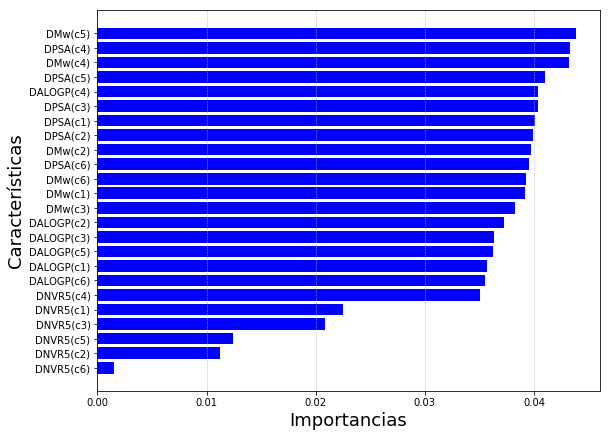

In [4]:
# Feature importances for our best method
cls = RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=seed,class_weight=class_weights)
cls.fit(X_tr_norm, y_tr_norm)
imp = cls.feature_importances_
#print("Importances: ", imp)

# Define a dictionary with features and their importances
d = dict(zip(columns, imp))
del d['prob']  # Delete probability

# Order the dictionary by the importances of each feature
ord_d = dict(sorted(d.items(), key=operator.itemgetter(1), reverse = True))

#print("Features ordered by their importances in a dictionary: ",ord_d)

plot_feature_importances(X_tr_norm,cls,ord_d)  # Ploting the results


Create a dataframe with features ordered by their importances:

In [5]:

df_imp = pd.DataFrame([[key, ord_d[key]] for key in ord_d.keys()], columns=['Features', 'Importances'])

print("Features ordered by their importances in a dataframe: ")
df_imp


Features ordered by their importances in a dataframe: 


,Features,Importances
0,DMw(c5),0.043829
1,DPSA(c4),0.043330
2,DMw(c4),0.043232
3,DPSA(c5),0.041015
4,DALOGP(c4),0.040389
5,DPSA(c3),0.040388
6,DPSA(c1),0.040071
7,DPSA(c2),0.039937
8,DMw(c2),0.039696
9,DPSA(c6),0.039535


In [ ]:
df_imp.to_csv(r'results\Features_ord_importances.csv',index=False)  # Saving results

...............